# CS675 – Introduction to Data Science (Project 1)

### Group-5 : Megha Godwal, Attender Pal Singh & Sherin Dubey

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_table('https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [4]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [5]:
# Find the pearson correlation to get the single feature of 'X' in the entire dataset

pearsoncorr = df.corr(method='pearson')
pearsoncorr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [6]:
def predict_with_linear_regression(X_train, X_test, Y_train, Y_test):
    
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)
    
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    
    # The intercept
    print('Intercept: \n', regr.intercept_)
    
    # The mean squared error
    # The coefficient of determination: 1 is perfect prediction
    
    print('Coefficient of determination: %.2f'
          % r2_score(Y_test, Y_pred))
    
    print('Mean squared error (VALIDATION): %.2f'
          % mean_squared_error(Y_test, Y_pred))
    
    Y_pred = regr.predict(X_train)
    
    print('Mean squared error (TRAINING): %.2f'
          % mean_squared_error(Y_train, Y_pred))

### 1) Predict the feature ‘y’ using a single feature of ‘X’ (in the entire dataset) Find out which feature from ‘X’ should be used for the best prediction of ‘y’. << Output >>:
### • Model’s coefficients (slope, y-intercept)
### • The Linear Regressor Model (graph) plotting
### • The MSE (Mean Square Error)

############   Answer 1   ############

Coefficients: 
 [[10.72956177]]
Intercept: 
 [-129.77649939]
Coefficient of determination: 0.18
Mean squared error (VALIDATION): 4103.87
Mean squared error (TRAINING): 3835.80


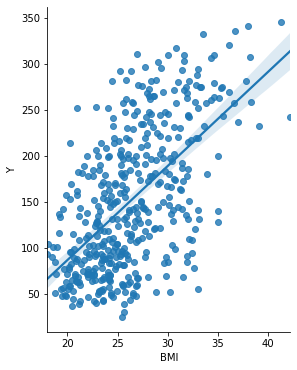

In [7]:
print("############   Answer 1   ############\n")

X = df['BMI'].values.reshape(-1, 1)
Y = df['Y'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100, random_state=0)
predict_with_linear_regression(X_train, X_test, Y_train, Y_test)

sns.pairplot(df, x_vars=['BMI'], y_vars=['Y'], height=5, aspect=.8, kind='reg')

### 2) Predict the feature ‘y’ using a pair feature of ‘X’ (in the entire dataset)
### Find out which pair feature from ‘X’ should be used for the best prediction of ‘y’. << Output >>:
### • Model’s coefficients (slope, y-intercept)
### • The Linear Regressor Model (graph) plotting.
### • The MSE (Mean Square Error)

############   Answer 2   ############

Coefficients: 
 [[ 7.6403511  56.15474545]]
Intercept: 
 [-309.50862461]
Coefficient of determination: 0.29
Mean squared error (VALIDATION): 3555.20
Mean squared error (TRAINING): 3106.63


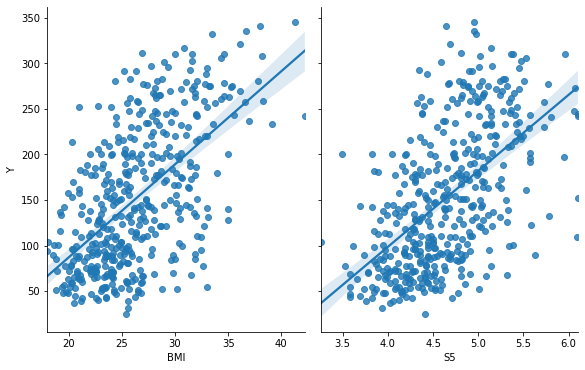

In [8]:
print("############   Answer 2   ############\n")

X = df[['BMI', 'S5']].values
Y = df['Y'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100, random_state=0)
predict_with_linear_regression(X_train, X_test, Y_train, Y_test)

sns.pairplot(df, x_vars=['BMI', 'S5'], y_vars=['Y'], height=5, aspect=.8, kind='reg')

### 3) Predict the feature ‘y’ using all (10) features of ‘X’ (in the entire dataset) << Output >>: Model’s coefficients & The MSE (Mean Square Error)

In [9]:
print("############   Answer 3   ############\n")

X = df.drop(labels='Y', axis=1)
Y = df['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=200, random_state=0)
predict_with_linear_regression(X_train, X_test, Y_train, Y_test)

############   Answer 3   ############

Coefficients: 
 [-1.59554104e-01 -2.08941124e+01  5.98684936e+00  1.26659556e+00
 -9.37087345e-01  5.22036386e-01  3.59101056e-02  3.20100272e+00
  7.46250452e+01  6.63302903e-02]
Intercept: 
 -336.86307683026047
Coefficient of determination: 0.43
Mean squared error (VALIDATION): 3082.29
Mean squared error (TRAINING): 2751.99


### 4) Compute the training MSE and validation MSE when fitting the regressor in all features, for the following training set sizes:
### n_train = 20
### n_train = 50
### n_train = 100 
### n_train = 200

In [10]:
print("############   Answer 4   ############\n")

X = df.drop(labels='Y', axis=1)
Y = df['Y']
print("----- with n_train=20 -----\n")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=0)
predict_with_linear_regression(X_train, X_test, Y_train, Y_test)
print("\n----- with n_train=50 -----\n")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)
predict_with_linear_regression(X_train, X_test, Y_train, Y_test)
print("\n----- with n_train=100 -----\n")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=100, random_state=0)
predict_with_linear_regression(X_train, X_test, Y_train, Y_test)
print("\n----- with n_train=200 -----\n")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=200, random_state=0)
predict_with_linear_regression(X_train, X_test, Y_train, Y_test)

############   Answer 4   ############

----- with n_train=20 -----

Coefficients: 
 [ -0.11734407 -24.53965095   5.53268771   1.16526856  -1.05514479
   0.71372115   0.34074081   6.81751183  66.99148335   0.34265495]
Intercept: 
 -331.84150578469246
Coefficient of determination: 0.52
Mean squared error (VALIDATION): 2850.24
Mean squared error (TRAINING): 2862.27

----- with n_train=50 -----

Coefficients: 
 [ -0.14685258 -21.58965057   5.68635164   1.09526668  -0.86276317
   0.57718689   0.08155606   4.66750016  64.81661631   0.31546553]
Intercept: 
 -319.5667400996893
Coefficient of determination: 0.39
Mean squared error (VALIDATION): 2996.24
Mean squared error (TRAINING): 2846.93

----- with n_train=100 -----

Coefficients: 
 [ -0.11102883 -21.8098389    6.08398307   1.05380217  -0.93485949
   0.53780567   0.12153805   5.91006762  67.60842067   0.16386304]
Intercept: 
 -313.95663917155093
Coefficient of determination: 0.36
Mean squared error (VALIDATION): 3228.69
Mean squared error 